# Подключение библиотек

In [1]:
import numpy as np          
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd       
import seaborn as sns       
import sklearn   
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Описание работы

Удовлетворенность клиентов авиакомпании зависит от многих факторов, но по сути этот тип удовлетворенности клиентов ничем не отличается от любого другого бизнеса. Проблема заключается в том, что авиакомпании подвержены влиянию многих нормативных актов и предоставляют услугу, которая является чрезвычайно сложной, поэтому не все факторы, влияющие на удовлетворенность клиентов, полностью находятся под контролем авиакомпании. Таким образом, многие авиакомпании пытаются компенсировать разницу, предоставляя исключительное обслуживание и комфорт клиентов и посредством высококачественной презентации. Поэтому любой авиакомпании нужно разработать конкретный механизм измерения удовлетворенности пассажиров услугами, предоставленных авиакомпанией. В данной работе решается задача классификации удовлетворенности клиентов авикомпании.

# Загрузка, чтение и обработка данных

In [2]:
url = "https://raw.githubusercontent.com/Nikita23456/Machinelearning/main/airline_passenger_satisfaction.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(129880, 24)

Переименуем колонку "Unnamed 0" в "ID"

In [3]:
data_raw.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
data_raw.columns

Index(['ID', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Преобразуем к типу 'category'

In [4]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('category')
data_raw['customer_class'] = data_raw['customer_class'].astype('category')
data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')

In [5]:
data_raw = pd.get_dummies(data_raw, drop_first=True)
print(data_raw.shape)
data_raw.head()

(129880, 25)


,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,1,0,1,0,1,0
1,1,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,1,1,0,0,0,0
2,2,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,3,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,4,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1,0,0,0,0,1


Зная из первой лабораторной работы, что  в одном столбце (задержка прибытия) отсутствуют значения, и их число невелико(393). Однако две задержки сильно коррелированы, и действительно значение корреляции составляет 0,965. Таким образом, мы можем использовать данные о задержке отправления для вменения недостающих данных о задержке прибытия.

In [6]:
data_raw['arrival_delay_in_minutes'].fillna(data_raw['departure_delay_in_minutes'], inplace = True)
print (data_raw.isnull().sum())

ID                                   0
age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
satisfaction_satisfied               0
dtype: int64


Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

In [7]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.500000,0.415743,0.234111,0.545739,0.611520,0.551375,0.595385,0.640955,0.650527,0.688272,...,0.728439,0.657265,0.009242,0.009571,0.492616,0.183092,0.309416,0.448945,0.072459,0.434463
std,0.288678,0.193838,0.201424,0.265868,0.305348,0.280348,0.255704,0.265987,0.270144,0.263858,...,0.235334,0.262736,0.023914,0.024368,0.499947,0.386743,0.462255,0.497388,0.259248,0.495688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.423077,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,...,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.564103,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,...,1.000000,0.800000,0.007538,0.008207,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Разбиение датасета на обучающую и тестовую выборки


In [8]:
X = data_normal.drop (['ID', 'satisfaction_satisfied'], axis=1) 
y = data_raw['satisfaction_satisfied']

Разобьем данные на обучающую и тестовую выборки в пропорции 2:1 (66% - обучающая выборка, 33% - тестовая):

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

In [11]:
N_train, N_test

(87019, 42861)

# Создание модели и ее обучение

In [12]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'adam', 
                          activation = 'relu',
                          max_iter=1000,
                          random_state = 30)


In [13]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 2min 32s


MLPClassifier(max_iter=1000, random_state=30)

Проверка качества классификатора:

In [14]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Проверка точности на обучающей и тестовой выборке:

In [15]:
print("TRAIN: {:.2f}% TEST: {:.2f}%".format(accuracy_score(y_train, y_train_pred)
      * 100, accuracy_score(y_test, y_test_pred) * 100))

TRAIN: 96.52% TEST: 96.02%


Так как точность на тренировочной выборке не сильно отличается от  тестовой, то мы не наблюдаем переобучения и недообучения.

# Подбор числа нейронов в однослойном классификаторе
В качестве алгоритма оптимизации выберем алгоритм Adam, в качестве функции активации выберем Relu, в качетве метрики оценки классификатора возьмем accuracy_score.

In [16]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [1:12:11<00:00, 86.63s/it] 


Train: минимальное значение ошибки = 0.038704191038738664, число нейронов = 48
Test: минимальное значение ошибки = 0.04185623293903549, число нейронов = 48


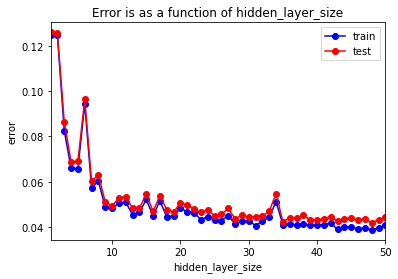

In [17]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print(f"Train: минимальное значение ошибки = {np.min(train_err)}, число нейронов = {hidden_layer_size[np.argmin(train_err)]}")
print(f"Test: минимальное значение ошибки = {np.min(test_err)}, число нейронов = {hidden_layer_size[np.argmin(test_err)]}")

Train: максимальное значение accuracy = 0.9612958089612613, число нейронов = 48
Test: максимальное значение accuracy = 0.9581437670609645, число нейронов = 48


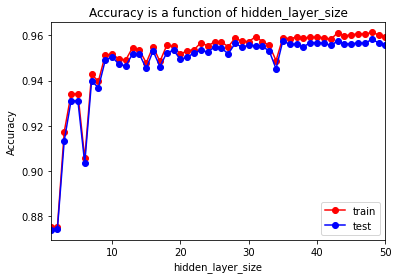

In [18]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print(f"Train: максимальное значение accuracy = {np.max(train_acc)}, число нейронов = {hidden_layer_size[np.argmax(train_acc)]}")
print(f"Test: максимальное значение accuracy = {np.max(test_acc)}, число нейронов = {hidden_layer_size[np.argmax(test_acc)]}")

# Подбор числа нейронов в двухслойном классификаторе

In [19]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [3:04:48, 1108.88s/it]


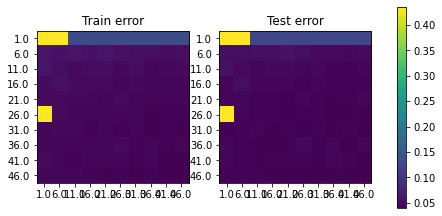

In [20]:
 plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

In [21]:
print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Min error=0.03216538916788288, number of neurons=45,40
Test: error=0.038869835048178994, number of neurons=45,40

Test: Min error=0.038869835048178994, number of neurons=45,40
Train: error=0.03216538916788288, number of neurons=45,40



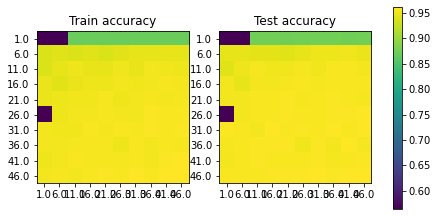

In [22]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

In [23]:
print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

Train: Max accuracy=0.9678346108321171, number of neurons=45,40
Test: accuracy=0.961130164951821, number of neurons=45,40

Test: Max accuracy=0.961130164951821, number of neurons=45,40
Train: accuracy=0.9678346108321171, number of neurons=45,40



# Подбор параметра регуляризации

Лучшие показатели подемонстрировала сеть из 2х слоев, при количесте нейронов (45,40).Будем подбирать параметры alpha для сети из 2-ух слоёв.

In [24]:
alphas = np.logspace(-5, 5, 50)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (45,40,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████| 50/50 [1:08:52<00:00, 82.64s/it] 


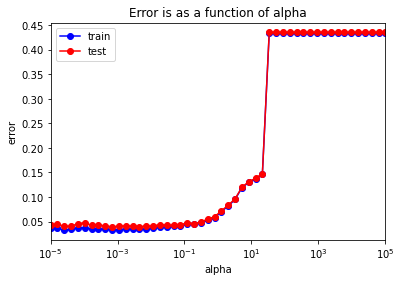

In [25]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

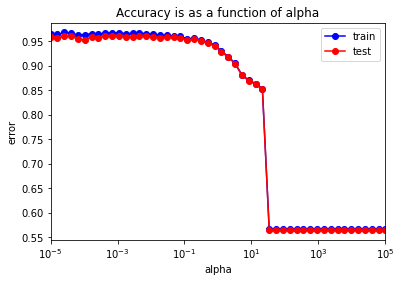

In [26]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

# Выводы

# Подбор числа нейронов в однослойном классификаторе


Т.к. графики  Error/Accuracy для train/test практически полностью совпадают, значит мы можем сказать, что данные  распределяются на тестовые и тренировочные одинаково.
Переобучения нет, следовательно в моделе нет высоких весовых значений и она достаточно простая, чтобы уметь обобщаться.
Недообучения так же нет, то есть модель достаточно сложная, чтобы решить поставленную задачу.

# Подбор числа нейронов в двухслойном классификаторе

Переобучения и недобучения также необнаружено.
Из полученных данных можно заметить, что при значимом увеличении нейронов точность увеличивается, но совсем незначительно, поэтому для данной задачи можно использовать однослойную сеть из 48 нейронов и получать при этом хорошую точность.

# Подбор параметра регуляризации

C ростом коэффициента регуляризации растет ошибка и падает accuracy, что говорит о том, что после обучения у модели не возникает больших значений весовых коэффициентов, а значит у модели нет переобучения.